# Predicting CitiBike Demand

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: Data Loading and Preprocessing

### Load Data

In [ ]:
#df_train = pd.read_csv('data/2024_08/df_train.csv', low_memory=False)
df_weather = pd.read_csv('data/2024_08/weather_data_2024.csv', low_memory=False)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603575 entries, 0 to 4603574
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 456.6+ MB


In [4]:
df_train.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB4E29A011E918E,electric_bike,2024-08-13 22:28:13.065,2024-08-13 22:30:43.138,McKibbin St & Bogart St,5059.02,Wilson Ave & Troutman St,4864.09,40.706237,-73.933871,40.701660,-73.927540,member
1,6389E1E171CE17CD,classic_bike,2024-08-07 09:39:52.489,2024-08-07 09:43:14.975,Bialystoker Pl & Delancey St,5335.03,Norfolk St & Broome St,5374.01,40.716226,-73.982612,40.717227,-73.988021,member
2,3F4BBEBDFB7548C0,electric_bike,2024-08-10 21:04:35.143,2024-08-10 21:21:43.846,Rivington St & Chrystie St,5453.01,Kent Ave & Division Ave,5021.05,40.721101,-73.991925,40.706564,-73.968319,member
3,C0939F0CD7ED731E,classic_bike,2024-08-13 19:21:31.275,2024-08-13 19:33:43.790,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member
4,4CB3950095D804D6,electric_bike,2024-08-09 22:23:42.894,2024-08-09 22:58:04.455,E 34 St & Church Ave,3318.05,48 St & 2 Ave,3283.05,40.651160,-73.945770,40.650176,-74.015606,casual
5,585D1A3FEEF4867E,electric_bike,2024-08-02 16:58:20.753,2024-08-02 17:03:15.327,McKibbin St & Bogart St,5059.02,Suydam St & Broadway,4689.03,40.706237,-73.933871,40.695440,-73.932230,member
6,BAC50AFB465C607B,electric_bike,2024-08-07 23:12:24.982,2024-08-07 23:20:00.458,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member
7,4F4D162103E66917,electric_bike,2024-08-06 15:20:31.886,2024-08-06 15:32:23.192,8 Ave & W 16 St,6072.11,1 Ave & E 39 St,6303.01,40.740983,-74.001702,40.747140,-73.971130,member
8,DE6F03D235645CBF,classic_bike,2024-08-13 18:51:17.796,2024-08-13 19:06:27.537,Graham Ave & Grand St,5178.06,Stanton St & Norfolk St,5445.07,40.711863,-73.944024,40.720747,-73.986274,member
9,BC3A1D7C8884C727,electric_bike,2024-08-05 00:24:16.628,2024-08-05 00:58:38.898,8 Ave & W 16 St,6072.11,5 Ave & W 131 St,7735.05,40.740983,-74.001702,40.810140,-73.939730,member


In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              768 non-null    int64  
 1   datetime          768 non-null    object 
 2   temp              768 non-null    float64
 3   feelslike         768 non-null    float64
 4   dew               768 non-null    float64
 5   humidity          768 non-null    float64
 6   precip            768 non-null    float64
 7   precipprob        768 non-null    int64  
 8   preciptype        78 non-null     object 
 9   snow              768 non-null    int64  
 10  snowdepth         768 non-null    int64  
 11  windgust          768 non-null    float64
 12  windspeed         768 non-null    float64
 13  winddir           768 non-null    float64
 14  sealevelpressure  768 non-null    float64
 15  cloudcover        768 non-null    float64
 16  visibility        768 non-null    float64
 1

In [6]:
df_weather.head(10)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,10021,2024-07-31T00:00:00,77.0,77.0,70.1,79.36,0.0,0,NaN,0,...,1013.9,99.8,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
1,10021,2024-07-31T01:00:00,77.0,77.0,70.1,79.40,0.0,0,NaN,0,...,1013.3,89.1,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
2,10021,2024-07-31T02:00:00,77.0,77.0,71.1,81.90,0.0,0,NaN,0,...,1013.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
3,10021,2024-07-31T03:00:00,77.0,77.0,71.1,82.06,0.0,0,NaN,0,...,1012.7,90.0,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
4,10021,2024-07-31T04:00:00,77.0,77.0,71.1,82.10,0.0,0,NaN,0,...,1012.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
5,10021,2024-07-31T05:00:00,76.9,76.9,71.1,82.30,0.0,0,NaN,0,...,1012.2,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
6,10021,2024-07-31T06:00:00,77.0,77.0,72.0,84.43,0.0,0,NaN,0,...,1012.6,100.0,9.9,15,0.1,0,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
7,10021,2024-07-31T07:00:00,78.1,78.1,71.1,79.21,0.0,0,NaN,0,...,1012.4,89.8,9.9,83,0.3,1,NaN,Partially cloudy,partly-cloudy-day,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
8,10021,2024-07-31T08:00:00,78.2,78.2,71.1,78.83,0.0,0,NaN,0,...,1012.3,99.3,9.9,104,0.4,1,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
9,10021,2024-07-31T09:00:00,78.3,78.3,70.1,75.94,0.0,0,NaN,0,...,1012.6,99.3,9.9,139,0.5,1,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"


### Clean and Prepare Data

In [10]:
df_train.head(-10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB4E29A011E918E,electric_bike,2024-08-13 22:28:13.065,2024-08-13 22:30:43.138,McKibbin St & Bogart St,5059.02,Wilson Ave & Troutman St,4864.09,40.706237,-73.933871,40.701660,-73.927540,member
1,6389E1E171CE17CD,classic_bike,2024-08-07 09:39:52.489,2024-08-07 09:43:14.975,Bialystoker Pl & Delancey St,5335.03,Norfolk St & Broome St,5374.01,40.716226,-73.982612,40.717227,-73.988021,member
2,3F4BBEBDFB7548C0,electric_bike,2024-08-10 21:04:35.143,2024-08-10 21:21:43.846,Rivington St & Chrystie St,5453.01,Kent Ave & Division Ave,5021.05,40.721101,-73.991925,40.706564,-73.968319,member
3,C0939F0CD7ED731E,classic_bike,2024-08-13 19:21:31.275,2024-08-13 19:33:43.790,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member
4,4CB3950095D804D6,electric_bike,2024-08-09 22:23:42.894,2024-08-09 22:58:04.455,E 34 St & Church Ave,3318.05,48 St & 2 Ave,3283.05,40.651160,-73.945770,40.650176,-74.015606,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603560,38FD7D8E16816AC9,electric_bike,2024-08-31 15:35:53.969,2024-08-31 16:12:00.649,Henry St & Atlantic Ave,4531.05,N 12 St & Bedford Ave,5450.04,40.690893,-73.996123,40.720798,-73.954847,member
4603561,3BDAD1143141FAEF,electric_bike,2024-08-21 19:45:27.492,2024-08-21 19:56:25.075,Berkeley Pl & 7 Ave,4051.01,Parkside Ave & Parade Pl,3376.04,40.675147,-73.975232,40.653200,-73.966390,member
4603562,E3CD0013606E72AF,electric_bike,2024-08-17 16:16:10.281,2024-08-17 16:30:25.909,6 Ave & Canal St,5500.07,4 Ave & E 12 St,5788.15,40.722438,-74.005664,40.732647,-73.990110,casual
4603563,893D7B066F924BBC,electric_bike,2024-08-16 18:38:31.132,2024-08-16 19:04:34.490,Henry St & Atlantic Ave,4531.05,Parkside Ave & Parade Pl,3376.04,40.690893,-73.996123,40.653200,-73.966390,casual


In [11]:
# Check for duplicates
duplicates = df_train.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [12]:
# Check for missing values
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     2962
start_station_id       2962
end_station_name      12410
end_station_id        13353
start_lat              2962
start_lng              2962
end_lat               13332
end_lng               13332
member_casual             0
dtype: int64


In [13]:
# Compute percentage of missing values for each column
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.064341
start_station_id      0.064341
end_station_name      0.269573
end_station_id        0.290057
start_lat             0.064341
start_lng             0.064341
end_lat               0.289601
end_lng               0.289601
member_casual         0.000000
dtype: float64


In [14]:
# Drop rows with missing values where & missing < 5%
threshold = 5.0
cols_to_check = missing_percentage[missing_percentage < threshold].index
df_train = df_train.dropna(subset=cols_to_check)            


In [15]:
# Check results
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


#### Borough Identification

In [16]:
# Extrapolate borough boundaries
from shapely.geometry import Point
from shapely import wkt

# Load the borough boundaries CSV
borough_df = pd.read_csv('data/2024_08/Borough_Boundaries_20251104.csv')

# Parse the geometry column (it's in WKT format)
boroughs = {}
for _, row in borough_df.iterrows():
    borough_name = row['BoroName']
    geometry = wkt.loads(row['the_geom'])  # Convert WKT string to Shapely geometry
    boroughs[borough_name] = geometry

print(f"Loaded {len(boroughs)} boroughs: {list(boroughs.keys())}")


Loaded 5 boroughs: ['Staten Island', 'Bronx', 'Brooklyn', 'Queens', 'Manhattan']


In [17]:
# Function to find which borough a point is in
def get_borough(lat, lng):
    point = Point(lng, lat)  # Note: Point takes (longitude, latitude)
    for borough_name, geometry in boroughs.items():
        if geometry.contains(point):
            return borough_name
    return 'Unknown'

In [18]:
# Execute the function for Start Locations
df_train['start_borough'] = df_train.apply(
    lambda row: get_borough(row['start_lat'], row['start_lng']), 
    axis=1
)

print("\nBorough distribution:")
print(df_train['start_borough'].value_counts())


Borough distribution:
Manhattan    2847392
Brooklyn     1263642
Queens        327405
Bronx         149429
Name: start_borough, dtype: int64


In [19]:
# Execute the function for End Locations
df_train['end_borough'] = df_train.apply(
    lambda row: get_borough(row['end_lat'], row['end_lng']), 
    axis=1
)

print("\nEnd borough distribution:")
print(df_train['end_borough'].value_counts())


End borough distribution:
Manhattan    2840304
Brooklyn     1270190
Queens        326190
Bronx         150848
Unknown          336
Name: end_borough, dtype: int64


In [20]:
df_train.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_borough,end_borough
0,5CB4E29A011E918E,electric_bike,2024-08-13 22:28:13.065,2024-08-13 22:30:43.138,McKibbin St & Bogart St,5059.02,Wilson Ave & Troutman St,4864.09,40.706237,-73.933871,40.701660,-73.927540,member,Brooklyn,Brooklyn
1,6389E1E171CE17CD,classic_bike,2024-08-07 09:39:52.489,2024-08-07 09:43:14.975,Bialystoker Pl & Delancey St,5335.03,Norfolk St & Broome St,5374.01,40.716226,-73.982612,40.717227,-73.988021,member,Manhattan,Manhattan
2,3F4BBEBDFB7548C0,electric_bike,2024-08-10 21:04:35.143,2024-08-10 21:21:43.846,Rivington St & Chrystie St,5453.01,Kent Ave & Division Ave,5021.05,40.721101,-73.991925,40.706564,-73.968319,member,Manhattan,Brooklyn
3,C0939F0CD7ED731E,classic_bike,2024-08-13 19:21:31.275,2024-08-13 19:33:43.790,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member,Manhattan,Manhattan
4,4CB3950095D804D6,electric_bike,2024-08-09 22:23:42.894,2024-08-09 22:58:04.455,E 34 St & Church Ave,3318.05,48 St & 2 Ave,3283.05,40.651160,-73.945770,40.650176,-74.015606,casual,Brooklyn,Brooklyn
5,585D1A3FEEF4867E,electric_bike,2024-08-02 16:58:20.753,2024-08-02 17:03:15.327,McKibbin St & Bogart St,5059.02,Suydam St & Broadway,4689.03,40.706237,-73.933871,40.695440,-73.932230,member,Brooklyn,Brooklyn
6,BAC50AFB465C607B,electric_bike,2024-08-07 23:12:24.982,2024-08-07 23:20:00.458,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member,Manhattan,Manhattan
7,4F4D162103E66917,electric_bike,2024-08-06 15:20:31.886,2024-08-06 15:32:23.192,8 Ave & W 16 St,6072.11,1 Ave & E 39 St,6303.01,40.740983,-74.001702,40.747140,-73.971130,member,Manhattan,Manhattan
8,DE6F03D235645CBF,classic_bike,2024-08-13 18:51:17.796,2024-08-13 19:06:27.537,Graham Ave & Grand St,5178.06,Stanton St & Norfolk St,5445.07,40.711863,-73.944024,40.720747,-73.986274,member,Brooklyn,Manhattan
9,BC3A1D7C8884C727,electric_bike,2024-08-05 00:24:16.628,2024-08-05 00:58:38.898,8 Ave & W 16 St,6072.11,5 Ave & W 131 St,7735.05,40.740983,-74.001702,40.810140,-73.939730,member,Manhattan,Manhattan


In [21]:
# Keep only Manhattan, Brooklyn Start and End Boroughs
df_train = df_train[df_train['start_borough'].isin(['Manhattan', 'Brooklyn'])]
df_train = df_train[df_train['end_borough'].isin(['Manhattan', 'Brooklyn'])]

In [22]:
# Check results after dropping
print("\nBorough distribution:")
print(df_train['start_borough'].value_counts())

print("\nEnd borough distribution:")
print(df_train['end_borough'].value_counts())


Borough distribution:
Manhattan    2793422
Brooklyn     1220857
Name: start_borough, dtype: int64

End borough distribution:
Manhattan    2788330
Brooklyn     1225949
Name: end_borough, dtype: int64


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4014279 entries, 0 to 4603571
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  start_borough       object 
 14  end_borough         object 
dtypes: float64(4), object(11)
memory usage: 490.0+ MB


In [ ]:
# Export cleaned dataframe to CSV
df_train.to_csv('data/2024_08/df_train_boroughs.csv', index=False)

In [3]:
df_train_cleaned = pd.read_csv('data/2024_08/df_train_boroughs.csv', low_memory=False)

In [5]:
# Convert datetime columns from string to datetime format
df_train_cleaned['started_at'] = pd.to_datetime(df_train_cleaned['started_at'])
df_train_cleaned['ended_at'] = pd.to_datetime(df_train_cleaned['ended_at'])

df_train_cleaned['trip_duration'] = (df_train_cleaned['ended_at'] - df_train_cleaned['started_at']).dt.total_seconds() / 60

In [6]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014279 entries, 0 to 4014278
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_borough       object        
 14  end_borough         object        
 15  trip_duration       float64       
dtypes: datetime64[ns](2), float64(5), object(9)
memory usage: 490.0+ MB


In [7]:
print(df_train_cleaned['trip_duration'].describe())

count    4.014279e+06
mean     1.370771e+01
std      2.010477e+01
min      1.000333e+00
25%      5.580983e+00
50%      9.673200e+00
75%      1.681856e+01
max      1.498657e+03
Name: trip_duration, dtype: float64


#### Remove outliers based on trip duration

In [9]:
# Calculate IQR
Q1 = df_train_cleaned['trip_duration'].quantile(0.25)
Q3 = df_train_cleaned['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_train_cleaned[(df_train_cleaned['trip_duration'] < lower_bound) | 
                    (df_train_cleaned['trip_duration'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(df_train_cleaned)*100:.2f}%)")


Number of outliers: 231226 (5.76%)


In [10]:
# Remove outliers using IQR method
df_train_cleaned = df_train_cleaned[(df_train_cleaned['trip_duration'] >= lower_bound) & (df_train_cleaned['trip_duration'] <= upper_bound)]

In [11]:
# Drop rides shorter than 1 minute
df_train_cleaned = df_train_cleaned[df_train_cleaned['trip_duration'] > 1]

In [13]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3783053 entries, 0 to 4014278
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_borough       object        
 14  end_borough         object        
 15  trip_duration       float64       
dtypes: datetime64[ns](2), float64(5), object(9)
memory usage: 490.7+ MB


#### Remove non rush-hour times

In [14]:
# Drop- non rush hour times, define rush hour or citibike - 7-10am, 5-7pm only on weekdays (remove August 3rd-4th, 10th-11th, 17th to 18th, 24th and 25th, 31st)

weekend_dates = [
    '2024-08-03', '2024-08-04', 
    '2024-08-10', '2024-08-11',  
    '2024-08-17', '2024-08-18',  
    '2024-08-24', '2024-08-25',  
    '2024-08-31']

rows_to_remove = pd.to_datetime(weekend_dates).date

df_train_cleaned['date'] = df_train_cleaned['started_at'].dt.date

initial_count = len(df_train_cleaned)
df_train_cleaned = df_train_cleaned[~df_train_cleaned['date'].isin(rows_to_remove)]

print(f"Removed {initial_count - len(df_train_cleaned)} rows from specified August weekend dates")
print(f"Remaining rows: {len(df_train_cleaned)}")


Removed 1036456 rows from specified August weekend dates
Remaining rows: 2746597


In [15]:
# Extract hour from started_at
df_train_cleaned['hour'] = df_train_cleaned['started_at'].dt.hour

# Define rush hour times
rush_hours = [7, 8, 9, 17, 18]

# Filter to keep only rush hour rides
df_train_cleaned = df_train_cleaned[df_train_cleaned['hour'].isin(rush_hours)]

# Drop the temporary hour column
df_train_cleaned = df_train_cleaned.drop('hour', axis=1)

print(f"Remaining rows after filtering for rush hours: {len(df_train_cleaned)}")



Remaining rows after filtering for rush hours: 1013116


#### Weather Dataframe

In [17]:
df_weather.head(30)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,10021,2024-07-31T00:00:00,77.0,77.0,70.1,79.36,0.000,0,NaN,0,...,1013.9,99.8,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
1,10021,2024-07-31T01:00:00,77.0,77.0,70.1,79.40,0.000,0,NaN,0,...,1013.3,89.1,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
2,10021,2024-07-31T02:00:00,77.0,77.0,71.1,81.90,0.000,0,NaN,0,...,1013.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
3,10021,2024-07-31T03:00:00,77.0,77.0,71.1,82.06,0.000,0,NaN,0,...,1012.7,90.0,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
4,10021,2024-07-31T04:00:00,77.0,77.0,71.1,82.10,0.000,0,NaN,0,...,1012.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
5,10021,2024-07-31T05:00:00,76.9,76.9,71.1,82.30,0.000,0,NaN,0,...,1012.2,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
6,10021,2024-07-31T06:00:00,77.0,77.0,72.0,84.43,0.000,0,NaN,0,...,1012.6,100.0,9.9,15,0.1,0,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
7,10021,2024-07-31T07:00:00,78.1,78.1,71.1,79.21,0.000,0,NaN,0,...,1012.4,89.8,9.9,83,0.3,1,NaN,Partially cloudy,partly-cloudy-day,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
8,10021,2024-07-31T08:00:00,78.2,78.2,71.1,78.83,0.000,0,NaN,0,...,1012.3,99.3,9.9,104,0.4,1,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
9,10021,2024-07-31T09:00:00,78.3,78.3,70.1,75.94,0.000,0,NaN,0,...,1012.6,99.3,9.9,139,0.5,1,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"


In [18]:
# Keep only August 2024 data
df_weather = df_weather[df_weather['datetime'].str.contains('2024-08-')]

print(f"Remaining rows: {len(df_weather)}")

Remaining rows: 744


In [ ]:
# Print weather columns
print(df_weather.columns.tolist())

['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']


In [ ]:
# Drop unnecessary columns from weather data
df_weather = df_weather.drop(columns=[
    'severerisk',     
    'icon',            
    'stations',        
    'preciptype',      
    'snow',            
    'snowdepth',
    'name',
    'feelslike',        
    'humidity',
    'solarradiation',
    'solarenergy',
    'uvindex',
])

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 24 to 767
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          744 non-null    object 
 1   temp              744 non-null    float64
 2   dew               744 non-null    float64
 3   precip            744 non-null    float64
 4   precipprob        744 non-null    int64  
 5   windgust          744 non-null    float64
 6   windspeed         744 non-null    float64
 7   winddir           744 non-null    float64
 8   sealevelpressure  744 non-null    float64
 9   cloudcover        744 non-null    float64
 10  visibility        744 non-null    float64
 11  conditions        744 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 75.6+ KB


In [21]:
# Export cleaned dataframe to CSV
df_train_cleaned.to_csv('data/2024_08/df_train_cleaned.csv', index=False)

### Merge Dataframes

In [22]:
# Sort df_train by the 'started_at' column
df_train_cleaned = df_train_cleaned.sort_values('started_at')
# Round trip duration to nearest 30 seconds
df_train_cleaned['trip_duration'] = (df_train_cleaned['trip_duration'] / .5).round() * .5

In [29]:
# Add column with hour of day to df_train to prepare for merge (rounded to nearest hour)
df_train_cleaned['start_hour'] = df_train_cleaned['started_at'].dt.round('h')

# Add similar column to weather df
df_weather['weather_hour'] = pd.to_datetime(df_weather['datetime']).dt.round('h')

In [32]:
# Merge the dataframes on the hour columns
df_merged = pd.merge(df_train_cleaned, df_weather, left_on='start_hour', right_on='weather_hour', how='left')

print(f"Merged dataframe shape: {df_merged.shape}")
df_merged.head()

Merged dataframe shape: (1013116, 31)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions,weather_hour
0,B743A57E14D3A694,classic_bike,2024-08-01 07:00:00.170,2024-08-01 07:09:54.156,W 51 St & Rockefeller Plaza,6700.14,West End Ave & W 60 St,7059.08,40.759738,-73.978116,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
1,CA6B198E9A07F6B9,classic_bike,2024-08-01 07:00:01.084,2024-08-01 07:08:32.861,W 54 St & 9 Ave,6920.05,E 51 St & Lexington Ave,6659.01,40.766040,-73.987370,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
2,E6B1133BC8AAAB14,electric_bike,2024-08-01 07:00:02.197,2024-08-01 07:09:58.287,W 31 St & 7 Ave,6331.01,E 23 St & 1 Ave,5929.01,40.749156,-73.991600,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
3,5D97A65D3420F371,electric_bike,2024-08-01 07:00:02.243,2024-08-01 07:07:01.293,West St & Liberty St,5184.08,Church St & Worth St,5359.13,40.711444,-74.014847,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
4,CA27E2C1C6D814F6,electric_bike,2024-08-01 07:00:02.614,2024-08-01 07:08:34.238,E 32 St & Park Ave,6280.12,E 56 St & 3 Ave,6691.11,40.745712,-73.981948,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00


In [ ]:
# Export the merged dataframe to CSV
df_merged.to_csv('data/2024_08/df_merged.csv', index=False)

### --> Load Merged DF Here

In [11]:
df_merged = pd.read_csv('data/2024_08/df_merged.csv', low_memory=False)

In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013116 entries, 0 to 1013115
Data columns (total 31 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1013116 non-null  object 
 1   rideable_type       1013116 non-null  object 
 2   started_at          1013116 non-null  object 
 3   ended_at            1013116 non-null  object 
 4   start_station_name  1013116 non-null  object 
 5   start_station_id    1013116 non-null  object 
 6   end_station_name    1013116 non-null  object 
 7   end_station_id      1013116 non-null  object 
 8   start_lat           1013116 non-null  float64
 9   start_lng           1013116 non-null  float64
 10  end_lat             1013116 non-null  float64
 11  end_lng             1013116 non-null  float64
 12  member_casual       1013116 non-null  object 
 13  start_borough       1013116 non-null  object 
 14  end_borough         1013116 non-null  object 
 15  trip_duration  

## Part 2: EDA 

In [15]:
# Drop unnecessary columns from merged dataframe
df_merged = df_merged.drop(columns=['windgust', 'sealevelpressure'])

In [53]:
# Group by start_station_id and sort by number of rides
station_id = df_merged.groupby('start_station_id').agg({
    'start_station_name': 'first',  # Get the station name
    'ride_id': 'count',  # Count rides per station
    'trip_duration': ['mean'], # Average trip duration per station
}).sort_values(('ride_id', 'count'), ascending=False)

print(f"Number of Unique Start Stations: {df_merged['start_station_id'].nunique()}")
print(f"Number of Unique End Stations: {df_merged['end_station_id'].nunique()}")

station_id

Number of Unique Start Stations: 1427
Number of Unique End Stations: 1418


,start_station_name,ride_id,trip_duration
,first,count,mean
start_station_id,,,
6492.08,9 Ave & W 33 St,3919,10.063664
6450.05,8 Ave & W 31 St,3902,10.916453
6140.05,W 21 St & 6 Ave,3889,9.094626
5329.03,West St & Chambers St,3813,13.306845
6432.11,E 40 St & Park Ave,3743,10.685413
...,...,...,...
5854.1,Stuyvesant Walk & 1 Ave Loop,1,11.500000
4455.1,Congress St & Clinton St,1,3.000000


In [54]:
# Count how many stations have exactly 1 ride
stations_with_one_ride = (station_id['ride_id', 'count'] == 1).sum()
print(f"Number of stations with exactly 1 ride: {stations_with_one_ride}")

# See distribution of ride counts
ride_count_distribution = station_id[('ride_id', 'count')].value_counts().sort_index()
print("Distribution of ride counts:")
print(ride_count_distribution.head(20))


Number of stations with exactly 1 ride: 6
Distribution of ride counts:
1     6
2     4
3     6
4     7
5     2
6     3
7     5
8     3
9     1
10    1
11    2
12    3
13    3
14    4
15    2
16    1
17    1
18    4
19    3
20    3
Name: (ride_id, count), dtype: int64


In [55]:
# Create start hour only row to filter for rush hour again (Fixing unknown issue)
df_merged['start_hour_only'] = pd.to_datetime(df_merged['start_hour']).dt.hour   

In [56]:
# Filter again for rush hour
df_merged = df_merged[df_merged['start_hour_only'].isin([7, 8, 9, 17, 18, 19])]
print(df_merged['start_hour_only'].unique())

[ 7  8  9 17 18 19]


In [57]:
# Create 15-minute time intervals for grouping (Start)
df_merged['start_time_interval'] = pd.to_datetime(df_merged['started_at']).dt.floor('15min')

# Display sample of the new column
print("Sample of start_time_interval:")
print(df_merged[['started_at', 'start_time_interval']].head(10))

# Show unique intervals
print(f"\nNumber of unique 15-minute intervals: {df_merged['start_time_interval'].nunique()}")

Sample of start_time_interval:
                started_at start_time_interval
0  2024-08-01 07:00:00.170 2024-08-01 07:00:00
1  2024-08-01 07:00:01.084 2024-08-01 07:00:00
2  2024-08-01 07:00:02.197 2024-08-01 07:00:00
3  2024-08-01 07:00:02.243 2024-08-01 07:00:00
4  2024-08-01 07:00:02.614 2024-08-01 07:00:00
5  2024-08-01 07:00:03.515 2024-08-01 07:00:00
6  2024-08-01 07:00:04.349 2024-08-01 07:00:00
7  2024-08-01 07:00:05.685 2024-08-01 07:00:00
8  2024-08-01 07:00:07.052 2024-08-01 07:00:00
9  2024-08-01 07:00:07.880 2024-08-01 07:00:00

Number of unique 15-minute intervals: 396


In [58]:
# Create 15-minute time intervals for grouping (End)
df_merged['end_time_interval'] = pd.to_datetime(df_merged['ended_at']).dt.floor('15min')

# Display sample of the new column
print("Sample of start_time_interval:")
print(df_merged[['ended_at', 'end_time_interval']].head(10))

# Show unique intervals
print(f"\nNumber of unique 15-minute intervals: {df_merged['end_time_interval'].nunique()}")

Sample of start_time_interval:
                  ended_at   end_time_interval
0  2024-08-01 07:09:54.156 2024-08-01 07:00:00
1  2024-08-01 07:08:32.861 2024-08-01 07:00:00
2  2024-08-01 07:09:58.287 2024-08-01 07:00:00
3  2024-08-01 07:07:01.293 2024-08-01 07:00:00
4  2024-08-01 07:08:34.238 2024-08-01 07:00:00
5  2024-08-01 07:02:54.941 2024-08-01 07:00:00
6  2024-08-01 07:04:29.205 2024-08-01 07:00:00
7  2024-08-01 07:09:45.477 2024-08-01 07:00:00
8  2024-08-01 07:06:14.733 2024-08-01 07:00:00
9  2024-08-01 07:20:25.362 2024-08-01 07:15:00

Number of unique 15-minute intervals: 526


#### Track Bike Availability Per Station at 15-minute intervals during Rush Hour

In [62]:
# Create departure events
departures_df = df_merged[['start_station_id', 'start_station_name', 'start_time_interval']].copy()
departures_df.columns = ['station_id', 'station_name', 'time_interval']
departures_df['event_type'] = -1  # -1 for departure

# Create arrival events
arrivals_df = df_merged[['end_station_id', 'end_station_name', 'end_time_interval']].copy()
arrivals_df.columns = ['station_id', 'station_name', 'time_interval']
arrivals_df['event_type'] = 1  # +1 for arrival

# Combine all events
all_events = pd.concat([departures_df, arrivals_df], ignore_index=True)

# Group by station and time interval
bike_changes = all_events.groupby(['station_id', 'time_interval']).agg({
    'station_name': 'first',
    'event_type': 'sum'
}).reset_index()
bike_changes.columns = ['station_id', 'time_interval', 'station_name', 'net_change']

# Sort and calculate cumulative
bike_changes = bike_changes.sort_values(['station_id', 'time_interval'])
bike_changes['cumulative_bikes'] = bike_changes.groupby('station_id')['net_change'].cumsum()

In [63]:
bike_changes.head(10)

,station_id,time_interval,station_name,net_change,cumulative_bikes
0,190 Morgan,2024-08-02 09:30:00,190 Morgan,1,1
1,190 Morgan,2024-08-06 08:00:00,190 Morgan,1,2
2,190 Morgan,2024-08-21 08:30:00,190 Morgan,1,3
3,190 Morgan,2024-08-23 09:15:00,190 Morgan,1,4
4,2733.03,2024-08-01 07:00:00,67 St & Erik Pl,-1,-1
5,2733.03,2024-08-01 08:15:00,67 St & Erik Pl,-1,-2
6,2733.03,2024-08-01 08:30:00,67 St & Erik Pl,1,-1
7,2733.03,2024-08-02 07:15:00,67 St & Erik Pl,-1,-2
8,2733.03,2024-08-02 08:30:00,67 St & Erik Pl,-1,-3
9,2733.03,2024-08-02 17:30:00,67 St & Erik Pl,-1,-4


##### Top 20 Stations by Net Inflow and Outflow

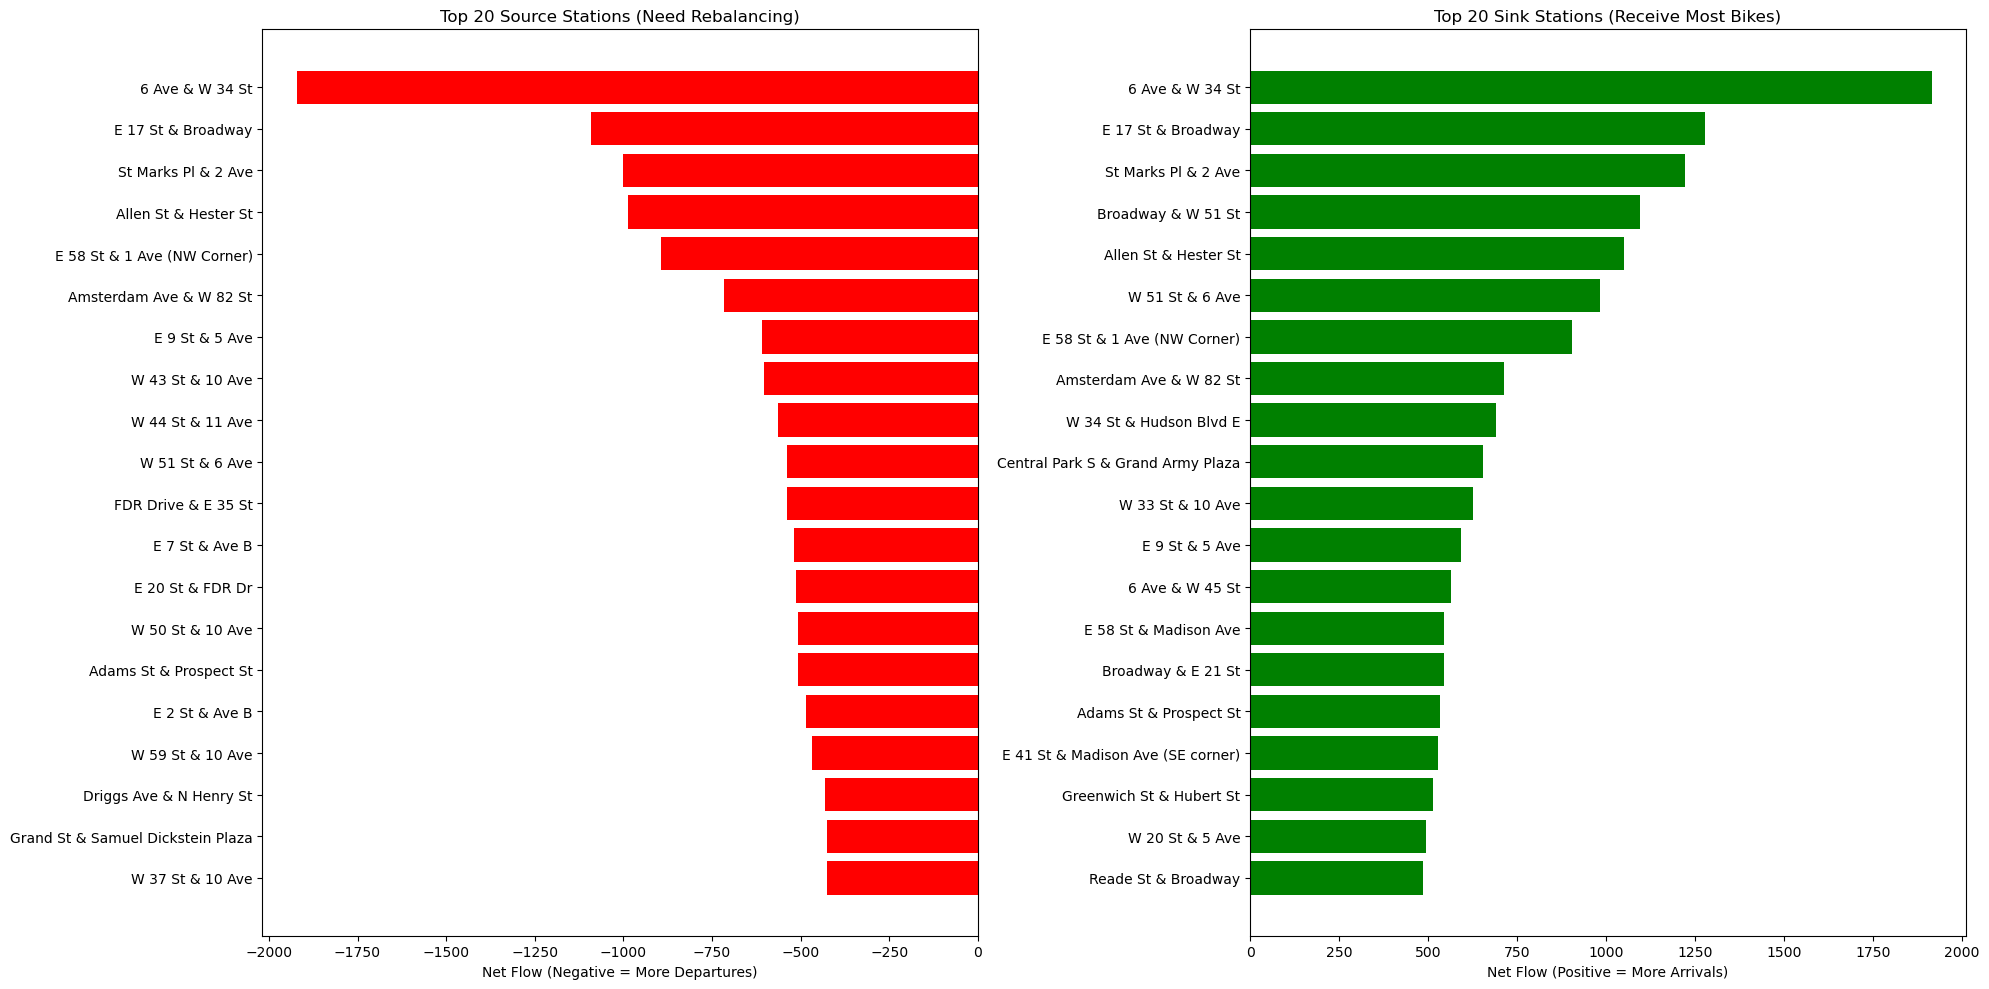

In [65]:
# Calculate total net flow per station
station_net_flow = bike_changes.groupby('station_id').agg({
    'station_name': 'first',
    'net_change': 'sum'
}).reset_index()
station_net_flow.columns = ['station_id', 'station_name', 'total_net_flow']

# Identify source stations (net negative) and sink stations (net positive)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Top 15 source stations (losing bikes)
sources = station_net_flow.nsmallest(20, 'total_net_flow')
ax1.barh(range(len(sources)), sources['total_net_flow'], color='red')
ax1.set_yticks(range(len(sources)))
ax1.set_yticklabels(sources['station_name'])
ax1.set_xlabel('Net Flow (Negative = More Departures)')
ax1.set_title('Top 20 Source Stations (Need Rebalancing)')
ax1.invert_yaxis()

# Top 15 sink stations (gaining bikes)
sinks = station_net_flow.nlargest(20, 'total_net_flow')
ax2.barh(range(len(sinks)), sinks['total_net_flow'], color='green')
ax2.set_yticks(range(len(sinks)))
ax2.set_yticklabels(sinks['station_name'])
ax2.set_xlabel('Net Flow (Positive = More Arrivals)')
ax2.set_title('Top 20 Sink Stations (Receive Most Bikes)')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


In [71]:
# Calculate total net flow per station
station_net_flow = bike_changes.groupby('station_id').agg({
    'station_name': 'first',
    'net_change': 'sum'
}).reset_index()
station_net_flow.columns = ['station_id', 'station_name', 'total_net_flow']

# Get top 20 outflow stations (most negative = losing bikes)
top_20_outflow = station_net_flow.nsmallest(20, 'total_net_flow')['station_id']

# Get top 20 inflow stations (most positive = gaining bikes)
top_20_inflow = station_net_flow.nlargest(20, 'total_net_flow')['station_id']

# Combine both
stations_to_plot = pd.concat([top_20_outflow, top_20_inflow])

# Get station locations
station_locations = df_merged.groupby('start_station_id').agg({
    'start_station_name': 'first',
    'start_lat': 'first',
    'start_lng': 'first'
}).reset_index()
station_locations.columns = ['station_id', 'station_name', 'lat', 'lng']

# Merge with net flow data
station_map_data = pd.merge(station_locations, station_net_flow[['station_id', 'total_net_flow']], on='station_id')

# Filter for top 20 inflow and outflow only
station_map_data = station_map_data[station_map_data['station_id'].isin(stations_to_plot)]

# Add category label
station_map_data['flow_type'] = station_map_data['total_net_flow'].apply(
    lambda x: 'Outflow (Need Bikes)' if x < 0 else 'Inflow (Excess Bikes)'
)

# For size, use absolute value
station_map_data['abs_flow'] = station_map_data['total_net_flow'].abs()

# Create map with two colors
fig = px.scatter_mapbox(station_map_data,
                        lat='lat',
                        lon='lng',
                        size='abs_flow',
                        color='flow_type',
                        hover_name='station_name',
                        hover_data={
                            'station_id': True,
                            'total_net_flow': ':.0f',
                            'abs_flow': False,
                            'lat': False,
                            'lng': False,
                            'flow_type': False
                        },
                        color_discrete_map={
                            'Outflow (Need Bikes)': 'red',
                            'Inflow (Excess Bikes)': 'green'
                        },
                        size_max=25,
                        zoom=11,
                        title='Top 20 Inflow vs Top 20 Outflow Stations for 08/2024',
                        labels={'total_net_flow': 'Net Flow'})

fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [72]:
bike_changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413942 entries, 0 to 413941
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   station_id        413942 non-null  object        
 1   time_interval     413942 non-null  datetime64[ns]
 2   station_name      413942 non-null  object        
 3   net_change        413942 non-null  int64         
 4   cumulative_bikes  413942 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 18.9+ MB


## Implement a Baseline Linear Regression Model

### Define a Target Variable (Y)

In [125]:
# Cumulative_bikes shows the running total of bikes at each station
# Negative values = station running out of bikes (needs inflow)
# Positive values = station accumulating bikes (needs outflow/has excess)

# Continuous target
bike_changes['rebalancing_demand'] = -bike_changes['cumulative_bikes']  # Negative cumulative = positive demand

### Feature Engineering

In [73]:
# Convert time_interval to datetime
bike_changes['time_interval'] = pd.to_datetime(bike_changes['time_interval'])

# Extract temporal features
bike_changes['hour'] = bike_changes['time_interval'].dt.hour
bike_changes['day_of_week'] = bike_changes['time_interval'].dt.dayofweek
bike_changes['minute'] = bike_changes['time_interval'].dt.minute
bike_changes['is_morning_rush'] = bike_changes['hour'].isin([7, 8, 9]).astype(int)
bike_changes['is_evening_rush'] = bike_changes['hour'].isin([17, 18, 19]).astype(int)

# Lag features (previous intervals)
bike_changes = bike_changes.sort_values(['station_id', 'time_interval'])

# Previous cumulative bikes (1, 2, and 4 intervals ago = 15, 30, 60 min)
bike_changes['cumulative_bikes_lag1'] = bike_changes.groupby('station_id')['cumulative_bikes'].shift(1)
bike_changes['cumulative_bikes_lag2'] = bike_changes.groupby('station_id')['cumulative_bikes'].shift(2)
bike_changes['cumulative_bikes_lag4'] = bike_changes.groupby('station_id')['cumulative_bikes'].shift(4)

# Rate of change
bike_changes['rate_of_change'] = bike_changes.groupby('station_id')['cumulative_bikes'].diff()
bike_changes['rate_of_change_lag1'] = bike_changes.groupby('station_id')['rate_of_change'].shift(1)

# Rolling statistics (over last hour = 4 intervals)
bike_changes['rolling_mean_4'] = bike_changes.groupby('station_id')['net_change'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)
bike_changes['rolling_std_4'] = bike_changes.groupby('station_id')['net_change'].transform(
    lambda x: x.rolling(window=4, min_periods=1).std()
)

print("Features created:")
print(bike_changes[['station_id', 'time_interval', 'cumulative_bikes', 'cumulative_bikes_lag1', 
                     'rate_of_change', 'rolling_mean_4']].head(20))

Features created:
    station_id       time_interval  cumulative_bikes  cumulative_bikes_lag1  \
0   190 Morgan 2024-08-02 09:30:00                 1                    NaN   
1   190 Morgan 2024-08-06 08:00:00                 2                    1.0   
2   190 Morgan 2024-08-21 08:30:00                 3                    2.0   
3   190 Morgan 2024-08-23 09:15:00                 4                    3.0   
4      2733.03 2024-08-01 07:00:00                -1                    NaN   
5      2733.03 2024-08-01 08:15:00                -2                   -1.0   
6      2733.03 2024-08-01 08:30:00                -1                   -2.0   
7      2733.03 2024-08-02 07:15:00                -2                   -1.0   
8      2733.03 2024-08-02 08:30:00                -3                   -2.0   
9      2733.03 2024-08-02 17:30:00                -4                   -3.0   
10     2733.03 2024-08-02 17:45:00                -7                   -4.0   
11     2733.03 2024-08-02 18:15:00

In [74]:
df_weather = pd.read_csv('data/2024_08/weather_data_2024.csv', low_memory=False)    

In [75]:
# Round weather data to 15-min intervals to match
df_weather['time_interval'] = pd.to_datetime(df_weather['datetime']).dt.floor('15min')

# Merge weather features
bike_changes = pd.merge(
    bike_changes, 
    df_weather[['time_interval', 'temp', 'dew', 'precip', 'precipprob', 'windspeed', 'cloudcover', 'visibility', 'conditions']], 
    on='time_interval', 
    how='left'
)

bike_changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413942 entries, 0 to 413941
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   station_id             413942 non-null  object        
 1   time_interval          413942 non-null  datetime64[ns]
 2   station_name           413942 non-null  object        
 3   net_change             413942 non-null  int64         
 4   cumulative_bikes       413942 non-null  int64         
 5   hour                   413942 non-null  int64         
 6   day_of_week            413942 non-null  int64         
 7   minute                 413942 non-null  int64         
 8   is_morning_rush        413942 non-null  int64         
 9   is_evening_rush        413942 non-null  int64         
 10  cumulative_bikes_lag1  412506 non-null  float64       
 11  cumulative_bikes_lag2  411073 non-null  float64       
 12  cumulative_bikes_lag4  408211 non-null  floa

In [76]:
# Remove Duplicate Columns After Merge

# Get all columns with _x or _y suffix
duplicate_cols = [col for col in bike_changes.columns if col.endswith('_x') or col.endswith('_y')]

print(f"Found {len(duplicate_cols)} duplicate columns: {duplicate_cols}")

# Drop all _y columns first
y_cols = [col for col in bike_changes.columns if col.endswith('_y')]
bike_changes = bike_changes.drop(columns=y_cols)

# Rename _x columns back to original names
x_cols = [col for col in bike_changes.columns if col.endswith('_x')]
rename_dict = {col: col.replace('_x', '') for col in x_cols}
bike_changes = bike_changes.rename(columns=rename_dict)

print(f"\nCleaned! Remaining columns: {len(bike_changes.columns)}")
print(bike_changes.columns.tolist())

Found 0 duplicate columns: []

Cleaned! Remaining columns: 25
['station_id', 'time_interval', 'station_name', 'net_change', 'cumulative_bikes', 'hour', 'day_of_week', 'minute', 'is_morning_rush', 'is_evening_rush', 'cumulative_bikes_lag1', 'cumulative_bikes_lag2', 'cumulative_bikes_lag4', 'rate_of_change', 'rate_of_change_lag1', 'rolling_mean_4', 'rolling_std_4', 'temp', 'dew', 'precip', 'precipprob', 'windspeed', 'cloudcover', 'visibility', 'conditions']


In [77]:
# Create binary rain indicator
bike_changes['is_raining'] = bike_changes['conditions'].str.contains('Rain', na=False).astype(int)

# Verify the encoding
print("Rain encoding verification:")
print(bike_changes[['conditions', 'is_raining']].drop_duplicates().sort_values('is_raining'))

# Check distribution
print(f"\nDistribution:")
print(f"No rain (0): {(bike_changes['is_raining'] == 0).sum()} intervals")
print(f"Rain (1): {(bike_changes['is_raining'] == 1).sum()} intervals")
print(f"Percentage rainy: {bike_changes['is_raining'].mean() * 100:.1f}%")


Rain encoding verification:
                  conditions  is_raining
0                        NaN           0
1                   Overcast           0
4                      Clear           0
24          Partially cloudy           0
108           Rain, Overcast           1
322   Rain, Partially cloudy           1
1159                    Rain           1

Distribution:
No rain (0): 405900 intervals
Rain (1): 8042 intervals
Percentage rainy: 1.9%


In [78]:
# Add 3 more columns back to bike_features and encode catergorical variables

# Create aggregated features from df_merged
interval_features = df_merged.copy()
interval_features['start_time_interval'] = pd.to_datetime(interval_features['started_at']).dt.floor('15min')

# Encode categorical variables
rideable_dummies = pd.get_dummies(interval_features['rideable_type'], prefix='bike_type')
member_dummies = pd.get_dummies(interval_features['member_casual'], prefix='user_type')

# Add to interval features and re-aggregate
interval_features_cat = pd.concat([interval_features, rideable_dummies, member_dummies], axis=1)

station_interval_agg_cat = interval_features_cat.groupby(['start_station_id', 'start_time_interval']).agg({
    'trip_duration': ['mean', 'median'],
    'bike_type_electric_bike': 'sum',
    'bike_type_classic_bike': 'sum',
    'user_type_member': 'sum',
    'user_type_casual': 'sum'
}).reset_index()

station_interval_agg_cat.columns = [
    'station_id', 'time_interval',
    'avg_trip_duration', 'median_trip_duration',
    'electric_bike_count', 'classic_bike_count',
    'member_count', 'casual_count'
]
station_interval_agg_cat.head()

# Merge
bike_changes = pd.merge(bike_changes, station_interval_agg_cat, on=['station_id', 'time_interval'], how='left')

#### Clean new DF

In [80]:
# 1. Drop redundant columns
bike_changes = bike_changes.drop(columns=['conditions'])

# 2. Fill missing weather data (forward fill from previous hour)
weather_cols = ['temp', 'dew', 'precip', 'precipprob', 'windspeed', 'cloudcover', 'visibility']

# Sort by station and time to ensure proper filling
bike_changes = bike_changes.sort_values(['station_id', 'time_interval'])

# Forward fill weather within each day (weather shouldn't change drastically in 15 min)
for col in weather_cols:
    bike_changes[col] = bike_changes.groupby('station_id')[col].ffill()
    # Also backward fill for any remaining NaNs at the start
    bike_changes[col] = bike_changes.groupby('station_id')[col].bfill()

# 3. Fill missing trip data with 0 (intervals with no rides)
trip_cols = ['avg_trip_duration', 'median_trip_duration', 'electric_bike_count', 
             'classic_bike_count', 'member_count', 'casual_count']

for col in trip_cols:
    bike_changes[col] = bike_changes[col].fillna(0)



In [81]:
print("Missing values after cleaning:")
print(bike_changes.isna().sum())

print(f"\nDataframe shape: {bike_changes.shape}")

Missing values after cleaning:
station_id                  0
time_interval               0
station_name                0
net_change                  0
cumulative_bikes            0
hour                        0
day_of_week                 0
minute                      0
is_morning_rush             0
is_evening_rush             0
cumulative_bikes_lag1    1436
cumulative_bikes_lag2    2869
cumulative_bikes_lag4    5731
rate_of_change           1436
rate_of_change_lag1      2869
rolling_mean_4              0
rolling_std_4            1436
temp                       29
dew                        29
precip                     29
precipprob                 29
windspeed                  29
cloudcover                 29
visibility                 29
is_raining                  0
avg_trip_duration           0
median_trip_duration        0
electric_bike_count         0
classic_bike_count          0
member_count                0
casual_count                0
dtype: int64

Dataframe shape: (413942,

#### Drop unused columns

In [64]:
# Columns to drop for modeling
cols_to_drop_modeling = [
    'minute',  # Low variance, redundant with 15-min intervals
    'net_change',  # Data leakage (directly calculates cumulative_bikes)
    'classic_bike_count',  # Redundant with electric_bike_count
    'casual_count',  # Redundant with member_count
    'cloudcover',
    'visibility',
    'precipprob',
    'precip',
    'dew'
]

# Create modeling dataset
bike_changes = bike_changes.drop(columns=cols_to_drop_modeling)

print(f"Columns after dropping: {bike_changes.shape[1]}")
print(f"\nFeatures for modeling:")
print(bike_changes.columns.tolist())

Columns after dropping: 21

Features for modeling:
['station_id', 'time_interval', 'cumulative_bikes', 'hour', 'day_of_week', 'is_morning_rush', 'is_evening_rush', 'cumulative_bikes_lag1', 'cumulative_bikes_lag2', 'cumulative_bikes_lag4', 'rate_of_change', 'rate_of_change_lag1', 'rolling_mean_4', 'rolling_std_4', 'temp', 'windspeed', 'is_raining', 'avg_trip_duration', 'median_trip_duration', 'electric_bike_count', 'member_count']


In [66]:
# Add bike station characteristic columns to bike_changes
# Get station-level features from df_merged
station_features = df_merged.groupby('start_station_id').agg({
    'start_lat': 'first',
    'start_lng': 'first',
    'start_station_name': 'first',
    'start_borough': 'first',
    'ride_id': 'count'  # Total historical rides
}).reset_index()

station_features.columns = ['station_id', 'lat', 'lng', 'station_name', 'borough', 'total_historical_rides']

# Label encode borough
from sklearn.preprocessing import LabelEncoder
le_borough = LabelEncoder()
station_features['borough_encoded'] = le_borough.fit_transform(station_features['borough'])

# Calculate average trip characteristics per station
station_trip_stats = df_merged.groupby('start_station_id').agg({
    'trip_duration': ['mean', 'std'],
    'member_casual': lambda x: (x == 'member').sum() / len(x)  # Member proportion
}).reset_index()

station_trip_stats.columns = ['station_id', 'avg_trip_duration_hist', 'std_trip_duration', 'member_proportion_hist']

# Merge with station features
station_features = pd.merge(station_features, station_trip_stats, on='station_id', how='left')


In [67]:
# Merge station characteristics
bike_changes = pd.merge(
    bike_changes,
    station_features[['station_id', 'lat', 'lng', 'borough', 'borough_encoded', 
                      'total_historical_rides', 'avg_trip_duration_hist', 
                      'std_trip_duration', 'member_proportion_hist']],
    on='station_id',
    how='left'
)

print(f"bike_changes shape after merge: {bike_changes.shape}")

bike_changes shape after merge: (413942, 29)


In [69]:
# Final check for missing values
missing_summary = pd.DataFrame({
    'Column': bike_changes.columns,
    'Missing_Count': bike_changes.isna().sum().values,
    'Missing_Percentage': (bike_changes.isna().sum().values / len(bike_changes) * 100).round(2)
})

# Sort by missing count descending
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)

# Display all columns
print(missing_summary.to_string(index=False))

                Column  Missing_Count  Missing_Percentage
 cumulative_bikes_lag4           5731                1.38
 cumulative_bikes_lag2           2869                0.69
   rate_of_change_lag1           2869                0.69
 cumulative_bikes_lag1           1436                0.35
        rate_of_change           1436                0.35
         rolling_std_4           1436                0.35
     std_trip_duration            417                0.10
       borough_encoded            253                0.06
                   lat            253                0.06
avg_trip_duration_hist            253                0.06
total_historical_rides            253                0.06
               borough            253                0.06
                   lng            253                0.06
member_proportion_hist            253                0.06
                  temp             29                0.01
             windspeed             29                0.01
            st

In [73]:
bike_changes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407835 entries, 8 to 413941
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   station_id              407835 non-null  object        
 1   time_interval           407835 non-null  datetime64[ns]
 2   cumulative_bikes        407835 non-null  int64         
 3   hour                    407835 non-null  int32         
 4   day_of_week             407835 non-null  int32         
 5   is_morning_rush         407835 non-null  int64         
 6   is_evening_rush         407835 non-null  int64         
 7   cumulative_bikes_lag1   407835 non-null  float64       
 8   cumulative_bikes_lag2   407835 non-null  float64       
 9   cumulative_bikes_lag4   407835 non-null  float64       
 10  rate_of_change          407835 non-null  float64       
 11  rate_of_change_lag1     407835 non-null  float64       
 12  rolling_mean_4          407835 non-

In [72]:
# Drop rows with missing values

bike_changes = bike_changes.dropna()

print(f"After dropping all NaN: {bike_changes.shape}")

# Verify no missing values
print(f"\nRemaining missing values: {bike_changes.isna().sum().sum()}")

After dropping all NaN: (407835, 29)

Remaining missing values: 0


In [82]:
# Total bikes leaving/arriving across ALL stations per interval
morning_data = bike_changes[bike_changes['is_morning_rush'] == 1].copy()
morning_data['time_only'] = pd.to_datetime(morning_data['time_interval']).dt.strftime('%H:%M')

# Sum across all stations (not average)
interval_total = morning_data.groupby('time_only').agg({
    'cumulative_bikes': 'sum'  # Total cumulative across all stations
}).reset_index()

interval_total = interval_total.sort_values('time_only')

fig = px.line(interval_total,
              x='time_only',
              y='cumulative_bikes',
              markers=True,
              title='TOTAL System-Wide Cumulative Bikes During Morning Rush<br>(Sum Across All Stations)',
              labels={'cumulative_bikes': 'Total Cumulative Bikes (All Stations)', 'time_only': 'Time'})
fig.add_hline(y=0, line_dash="dash", line_color="gray")

fig.show()

### Average inflow and outflow by station during morning and evening rush hour


In [ ]:
# Filter df_merged into morning and evening rush hour time interval
morning_trips = df_merged[df_merged['start_hour_only'].isin([7, 8])]
evening_trips = df_merged[df_merged['start_hour_only'].isin([17, 18])]

# Calculate morning flows
morning_departures = morning_trips.groupby(['start_station_id', 'start_station_name']).size().reset_index(name='total_departures')
morning_arrivals = morning_trips.groupby(['end_station_id', 'end_station_name']).size().reset_index(name='total_arrivals')

morning_flows = pd.merge(morning_departures, morning_arrivals,
                         left_on=['start_station_id', 'start_station_name'],
                         right_on=['end_station_id', 'end_station_name'],
                         how='outer').fillna(0)

morning_flows['station_id'] = morning_flows['start_station_id'].fillna(morning_flows['end_station_id'])
morning_flows['station_name'] = morning_flows['start_station_name'].fillna(morning_flows['end_station_name'])
morning_flows = morning_flows[['station_id', 'station_name', 'total_departures', 'total_arrivals']]

# Calculate evening flows
evening_departures = evening_trips.groupby(['start_station_id', 'start_station_name']).size().reset_index(name='total_departures')
evening_arrivals = evening_trips.groupby(['end_station_id', 'end_station_name']).size().reset_index(name='total_arrivals')

evening_flows = pd.merge(evening_departures, evening_arrivals,
                         left_on=['start_station_id', 'start_station_name'],
                         right_on=['end_station_id', 'end_station_name'],
                         how='outer').fillna(0)

evening_flows['station_id'] = evening_flows['start_station_id'].fillna(evening_flows['end_station_id'])
evening_flows['station_name'] = evening_flows['start_station_name'].fillna(evening_flows['end_station_name'])
evening_flows = evening_flows[['station_id', 'station_name', 'total_departures', 'total_arrivals']]


In [104]:
# Calculate averages per interval
morning_intervals = morning_trips['start_time_interval'].nunique()
evening_intervals = evening_trips['start_time_interval'].nunique()

morning_flows['avg_arrivals'] = morning_flows['total_arrivals'] / morning_intervals
morning_flows['avg_departures'] = morning_flows['total_departures'] / morning_intervals
morning_flows['avg_net_flow'] = morning_flows['avg_arrivals'] - morning_flows['avg_departures']
morning_flows['total_activity'] = morning_flows['total_arrivals'] + morning_flows['total_departures']

evening_flows['avg_arrivals'] = evening_flows['total_arrivals'] / evening_intervals
evening_flows['avg_departures'] = evening_flows['total_departures'] / evening_intervals
evening_flows['avg_net_flow'] = evening_flows['avg_arrivals'] - evening_flows['avg_departures']
evening_flows['total_activity'] = evening_flows['total_arrivals'] + evening_flows['total_departures']

# Classify stations
def classify_station(row):
    if row['total_activity'] == 0:
        return 'No Activity'
    imbalance = abs(row['avg_net_flow']) / (row['avg_arrivals'] + row['avg_departures'])
    if imbalance < 0.05:
        return 'Balanced'
    elif row['avg_net_flow'] > 0:
        return 'Net Inflow'
    else:
        return 'Net Outflow'

morning_flows['station_type'] = morning_flows.apply(classify_station, axis=1)
evening_flows['station_type'] = evening_flows.apply(classify_station, axis=1)

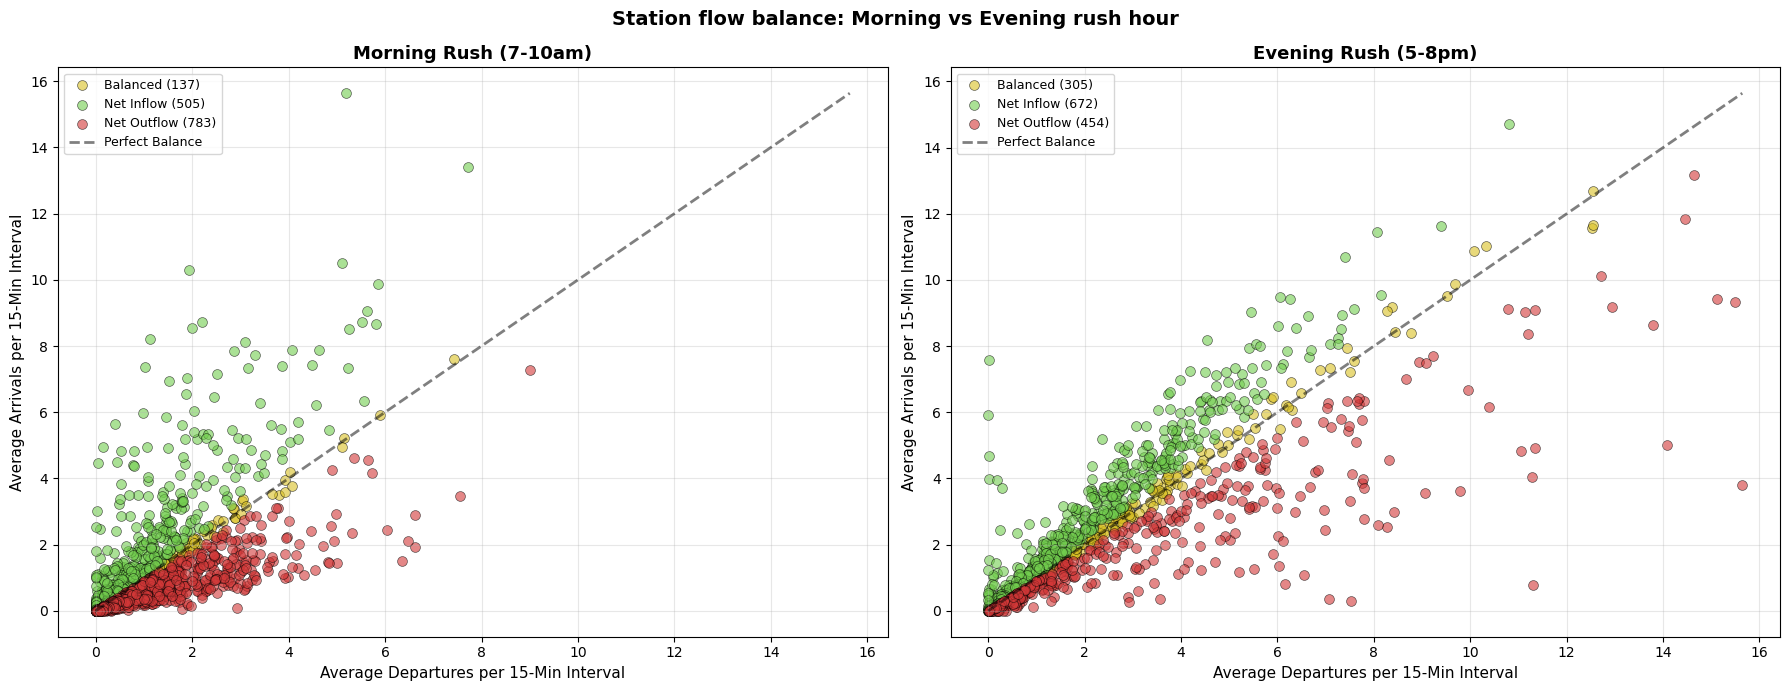

In [105]:
# Create side-by-side scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

colors = {
    'Balanced': "#D9C124",
    'Net Inflow': "#72CD4E",
    'Net Outflow': "#D23838",
    'No Activity': '#CCCCCC'
}

# Morning plot
for station_type, color in colors.items():
    subset = morning_flows[morning_flows['station_type'] == station_type]
    if len(subset) > 0:
        ax1.scatter(subset['avg_departures'], subset['avg_arrivals'],
                   s=50, c=color, alpha=0.6, edgecolors='black', linewidth=0.5,
                   label=f'{station_type} ({len(subset)})')

max_val_morning = max(morning_flows['avg_departures'].max(), morning_flows['avg_arrivals'].max())
ax1.plot([0, max_val_morning], [0, max_val_morning], 'k--', linewidth=2, alpha=0.5, label='Perfect Balance')
ax1.set_xlabel('Average Departures per 15-Min Interval', fontsize=11)
ax1.set_ylabel('Average Arrivals per 15-Min Interval', fontsize=11)
ax1.set_title('Morning Rush (7-10am)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=9)

# Evening plot
for station_type, color in colors.items():
    subset = evening_flows[evening_flows['station_type'] == station_type]
    if len(subset) > 0:
        ax2.scatter(subset['avg_departures'], subset['avg_arrivals'],
                   s=50, c=color, alpha=0.6, edgecolors='black', linewidth=0.5,
                   label=f'{station_type} ({len(subset)})')

max_val_evening = max(evening_flows['avg_departures'].max(), evening_flows['avg_arrivals'].max())
ax2.plot([0, max_val_evening], [0, max_val_evening], 'k--', linewidth=2, alpha=0.5, label='Perfect Balance')
ax2.set_xlabel('Average Departures per 15-Min Interval', fontsize=11)
ax2.set_ylabel('Average Arrivals per 15-Min Interval', fontsize=11)
ax2.set_title('Evening Rush (5-8pm)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', fontsize=9)

fig.suptitle('Station flow balance: Morning vs Evening rush hour', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Visualising the weather impact on bike usage

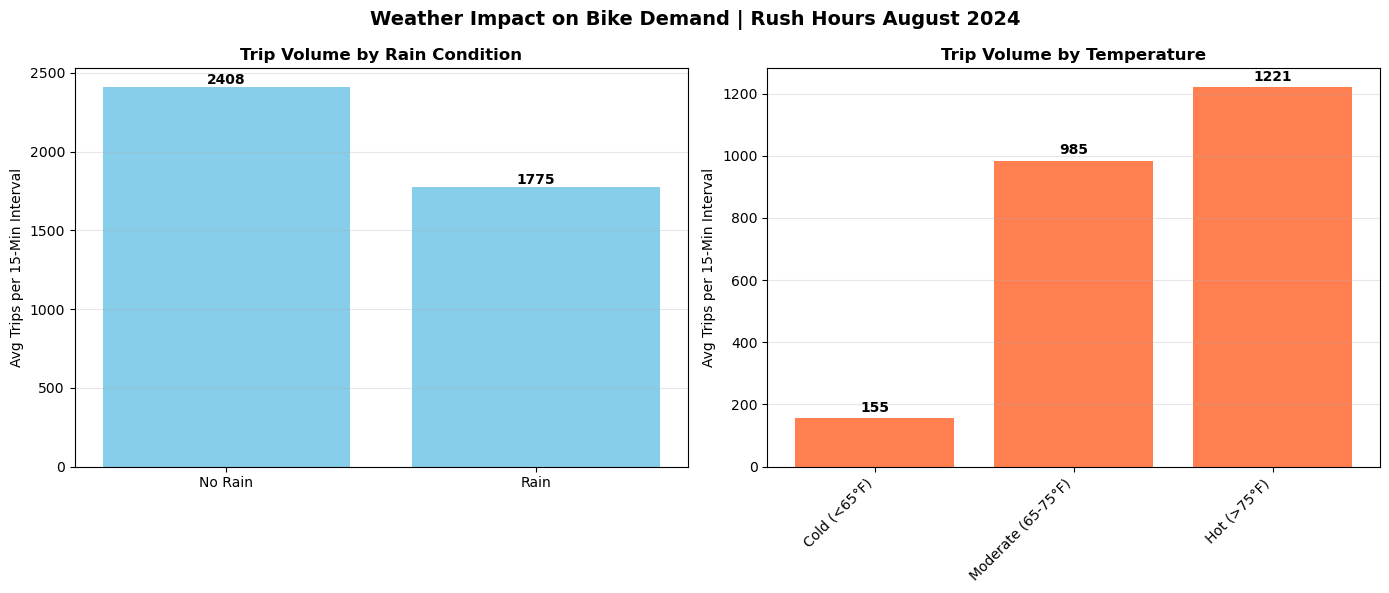


Rain Impact: 26.3% reduction in trips when raining
Temperature Impact: 87.3% reduction in trips from hot to cold weather


In [114]:
# Weather impact on bike demand

# Define temperature categories  
df_merged['temp_category'] = pd.cut(df_merged['temp'], 
                                     bins=[0, 65, 75, 100], 
                                     labels=['Cold (<65°F)', 'Moderate (65-75°F)', 'Hot (>75°F)'])

df_merged['rain_status'] = df_merged['precip'].apply(lambda x: 'Rain' if x > 0 else 'No Rain')

# Filter to rush hours
rush_hour_trips = df_merged[df_merged['start_hour_only'].isin([7, 8, 17, 18])]

# Calculate average trips per 15-min interval by weather
rain_demand = rush_hour_trips.groupby(['start_time_interval', 'rain_status']).size().reset_index(name='trip_count')
rain_avg = rain_demand.groupby('rain_status')['trip_count'].mean()

temp_demand = rush_hour_trips.groupby(['start_time_interval', 'temp_category']).size().reset_index(name='trip_count')
temp_avg = temp_demand.groupby('temp_category')['trip_count'].mean()

# Create side-by-side bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Rain impact
bars1 = ax1.bar(['No Rain', 'Rain'], rain_avg.values, color='skyblue')
ax1.set_title('Trip Volume by Rain Condition', fontsize=12, fontweight='bold')
ax1.set_ylabel('Avg Trips per 15-Min Interval')
ax1.grid(axis='y', alpha=0.3)

# Add values on bars
for i, (bar, val) in enumerate(zip(bars1, rain_avg.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{val:.0f}', ha='center', fontweight='bold')

# Temperature impact
bars2 = ax2.bar(range(len(temp_avg)), temp_avg.values, color='coral')
ax2.set_xticks(range(len(temp_avg)))
ax2.set_xticklabels(temp_avg.index, rotation=45, ha='right')
ax2.set_title('Trip Volume by Temperature', fontsize=12, fontweight='bold')
ax2.set_ylabel('Avg Trips per 15-Min Interval')
ax2.grid(axis='y', alpha=0.3)

# Add values on bars
for i, (bar, val) in enumerate(zip(bars2, temp_avg.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{val:.0f}', ha='center', fontweight='bold')

fig.suptitle('Weather Impact on Bike Demand | Rush Hours August 2024', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print insights
reduction_pct = ((rain_avg['No Rain'] - rain_avg['Rain'])/rain_avg['No Rain']*100)
print(f"\nRain Impact: {reduction_pct:.1f}% reduction in trips when raining")

# Calculate temperature reduction from hot to cold
hot_trips = temp_avg['Hot (>75°F)']
cold_trips = temp_avg['Cold (<65°F)']
temp_reduction_pct = ((hot_trips - cold_trips)/hot_trips*100)
print(f"Temperature Impact: {temp_reduction_pct:.1f}% reduction in trips from hot to cold weather")